# 🌞 Solar Energy Production Model 🌞



In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

In [4]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Spinnaker Project 2\Solar Energy.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_13008\1820826809.py:1: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\hp\Desktop\Spinnaker Project 2\Solar Energy.csv")


In [5]:
df.head()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [7]:
df.isnull().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

In [8]:
#Dropping Columns with Too Many Missing Values
df = df.drop(columns=['Division', 'Substation', 'Energy Storage System Size (kWac)'])

In [9]:
#Dropping Rows with Missing 'Project ID':
df = df.dropna(subset=['Project ID'])

In [10]:
#Filling Missing Values with Mode (Most Frequent Value)
df['City/Town'] = df['City/Town'].fillna(df['City/Town'].mode()[0])
df['Zip'] = df['Zip'].fillna(df['Zip'].mode()[0])
df['Circuit ID'] = df['Circuit ID'].fillna(df['Circuit ID'].mode()[0])
df['Metering Method'] = df['Metering Method'].fillna(df['Metering Method'].mode()[0])

In [13]:
#Dropping 'Developer' Column:
df = df.drop(columns=['Developer'])

In [14]:
df.isnull().sum()

Data Through Date                              0
Project ID                                     0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Zip                                            0
Circuit ID                                     0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Number of Projects                             0
dtype: int64

In [15]:
#Convert Dates to Datetime Objects
df['Data Through Date'] = pd.to_datetime(df['Data Through Date'], errors='coerce')
df['Interconnection Date'] = pd.to_datetime(df['Interconnection Date'], errors='coerce')

In [16]:
print(df[['Data Through Date', 'Interconnection Date']].dtypes)

Data Through Date       datetime64[ns]
Interconnection Date    datetime64[ns]
dtype: object


In [17]:
#Extract Additional Time-Based Features
df['Data Through Year'] = df['Data Through Date'].dt.year
df['Interconnection Year'] = df['Interconnection Date'].dt.year

In [18]:
print(df[['Data Through Date', 'Interconnection Date', 'Data Through Year', 'Interconnection Year']].head(10))

  Data Through Date Interconnection Date  Data Through Year  \
0        2023-12-31           2023-12-29               2023   
1        2023-12-31           2023-12-29               2023   
2        2023-12-31           2023-12-29               2023   
3        2023-12-31           2023-12-29               2023   
4        2023-12-31           2023-12-28               2023   
5        2023-12-31           2023-12-28               2023   
6        2023-12-31           2023-12-28               2023   
7        2023-12-31           2023-12-28               2023   
8        2023-12-31           2023-12-28               2023   
9        2023-12-31           2023-12-28               2023   

   Interconnection Year  
0                2023.0  
1                2023.0  
2                2023.0  
3                2023.0  
4                2023.0  
5                2023.0  
6                2023.0  
7                2023.0  
8                2023.0  
9                2023.0  


In [19]:
#One-Hot Encoding of Categorical Columns
categorical_columns = ['Utility', 'City/Town', 'County', 'Metering Method']

In [19]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [20]:
print(df.head())

  Data Through Date Project ID Interconnection Date Utility  \
0        2023-12-31  SDG-66301           2023-12-29  Con Ed   
1        2023-12-31  SDG-66299           2023-12-29  Con Ed   
2        2023-12-31  SDG-66288           2023-12-29  Con Ed   
3        2023-12-31  SDG-66284           2023-12-29  Con Ed   
4        2023-12-31  SDG-66277           2023-12-28  Con Ed   

             City/Town  County      Zip Circuit ID Metering Method  \
0        Richmond Hill  Queens  11418.0       9B05              NM   
1                Bronx   Bronx  10473.0       5X67              NM   
2             Brooklyn   Kings  11225.0       4B08              NM   
3             Brooklyn   Kings  11236.0       3037              NM   
4  Springfield Gardens  Queens  11413.0       9112              NM   

   Estimated PV System Size (kWdc)  PV System Size (kWac)  \
0                             6.05                   5.17   
1                             6.74                   5.76   
2                

In [21]:
print(df.columns)

Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Zip', 'Circuit ID', 'Metering Method',
       'Estimated PV System Size (kWdc)', 'PV System Size (kWac)',
       'Estimated Annual PV Energy Production (kWh)', 'Number of Projects',
       'Data Through Year', 'Interconnection Year'],
      dtype='object')


## Feature Engineering

In [22]:
df['Project Age'] = pd.Timestamp.now().year - df['Interconnection Date'].dt.year

In [23]:
df['Interconnection Month'] = df['Interconnection Date'].dt.month

In [24]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'


In [25]:
df['Season'] = df['Interconnection Month'].apply(get_season)


In [26]:
df = pd.get_dummies(df, columns=['Season'], drop_first=True)


In [27]:
season_columns = [col
                  for col in df.columns 
                  if col.startswith('Season_')
                 ]


In [28]:
print(df[['Interconnection Date', 'Project Age', 'Interconnection Month'] + season_columns].head())


  Interconnection Date  Project Age  Interconnection Month  Season_Spring  \
0           2023-12-29          1.0                   12.0          False   
1           2023-12-29          1.0                   12.0          False   
2           2023-12-29          1.0                   12.0          False   
3           2023-12-29          1.0                   12.0          False   
4           2023-12-28          1.0                   12.0          False   

   Season_Summer  Season_Winter  
0          False           True  
1          False           True  
2          False           True  
3          False           True  
4          False           True  


## EDA

In [29]:
utility_columns = [col for col in df.columns if col.startswith('Utility_')]
print(utility_columns)


['Utility_Con Ed', 'Utility_NYSEG', 'Utility_National Grid', 'Utility_O&R', 'Utility_PSEGLI', 'Utility_RGE']


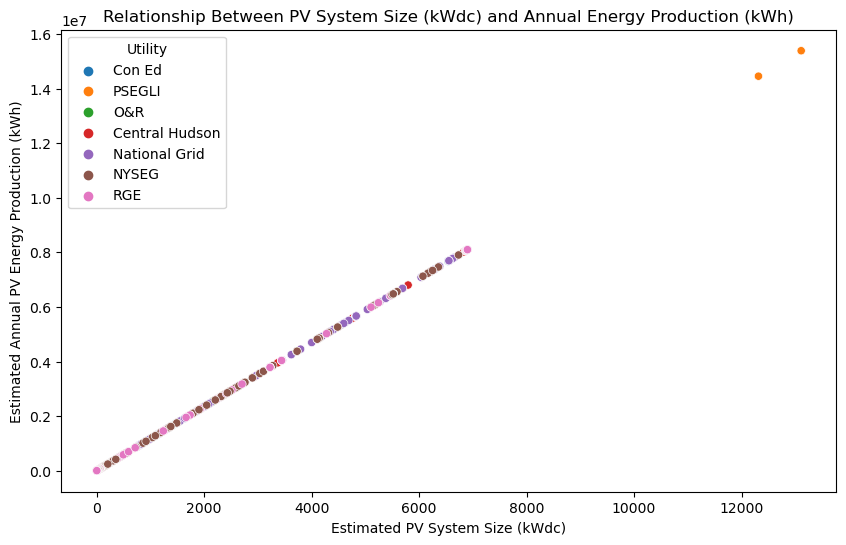

In [22]:
# Scatter plot to visualize the relationship between Estimated PV System Size (kWdc) and Estimated Annual PV Energy Production (kWh)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Estimated PV System Size (kWdc)', y='Estimated Annual PV Energy Production (kWh)', hue='Utility')
plt.title('Relationship Between PV System Size (kWdc) and Annual Energy Production (kWh)')
plt.xlabel('Estimated PV System Size (kWdc)')
plt.ylabel('Estimated Annual PV Energy Production (kWh)')
plt.legend(title='Utility')
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


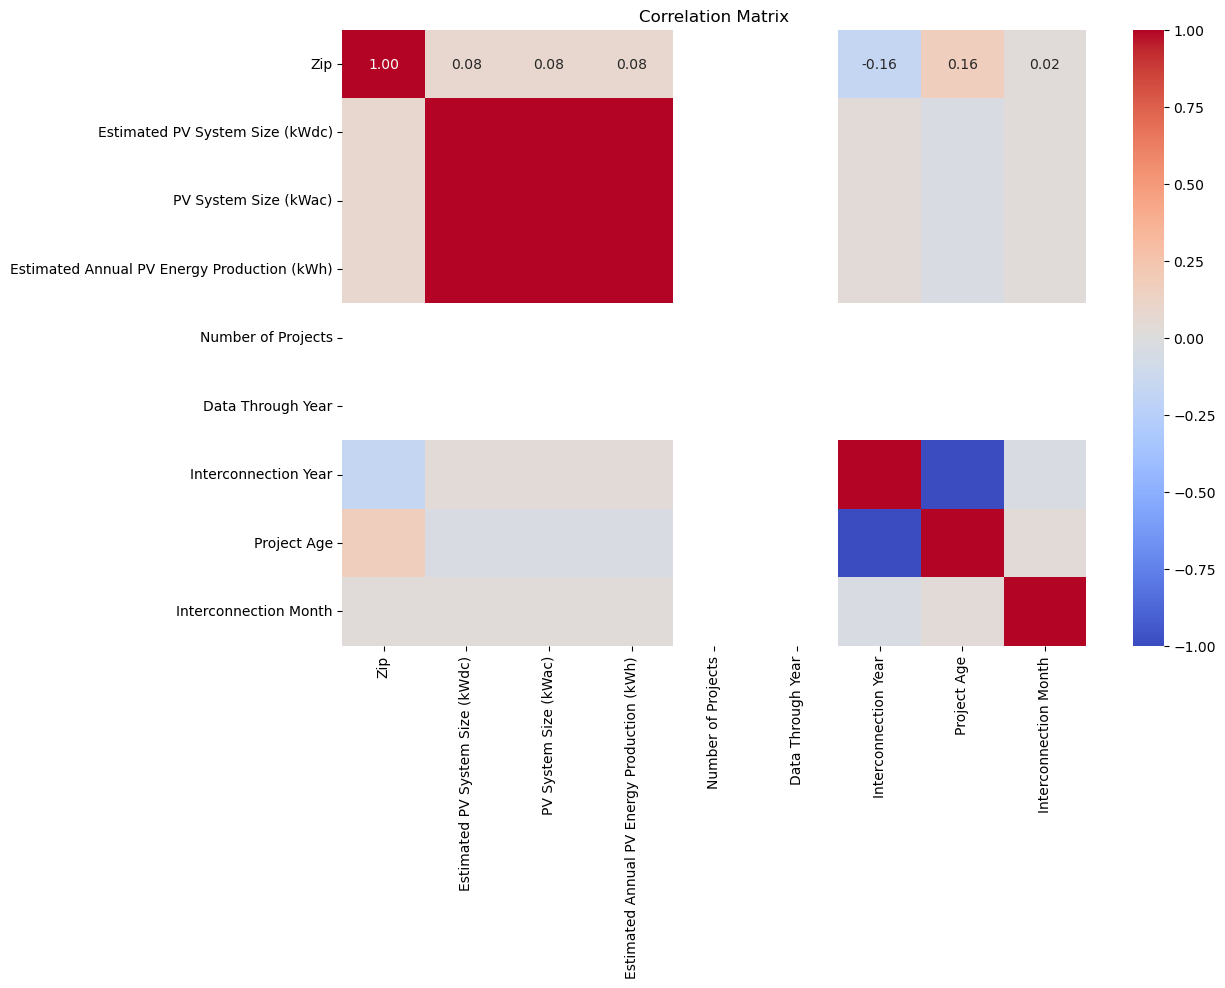

In [31]:
# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

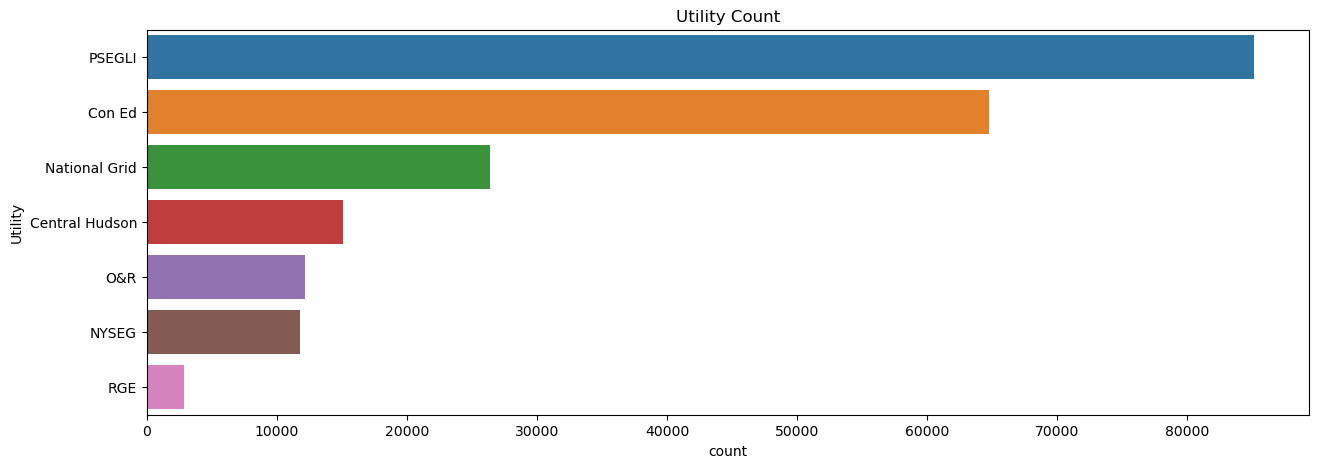

In [23]:
# Count plot for categorical columns
plt.figure(figsize=(15, 5))
sns.countplot(y='Utility', data=df, order=df['Utility'].value_counts().index).set_title('Utility Count')
plt.show()

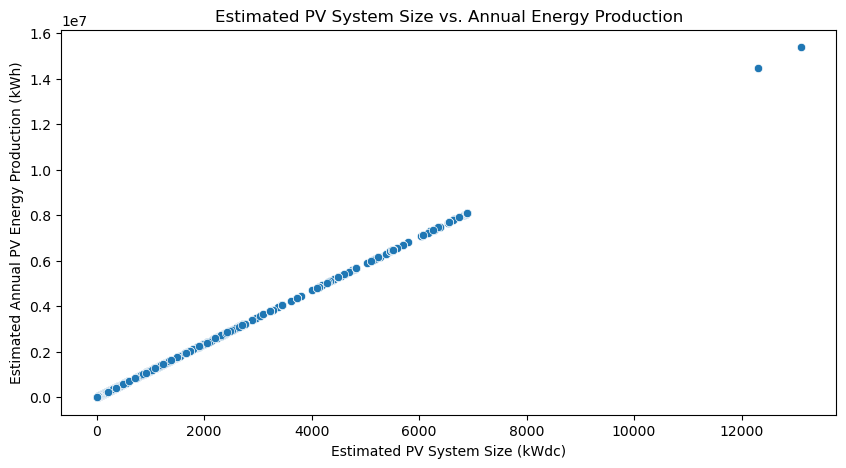

In [33]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Estimated PV System Size (kWdc)', y='Estimated Annual PV Energy Production (kWh)', data=df)
plt.title('Estimated PV System Size vs. Annual Energy Production')
plt.xlabel('Estimated PV System Size (kWdc)')
plt.ylabel('Estimated Annual PV Energy Production (kWh)')
plt.show()

In [34]:
# Create a pivot table to get average energy production by ZIP
zip_energy = df.groupby('Zip')['Estimated Annual PV Energy Production (kWh)'].mean().reset_index()

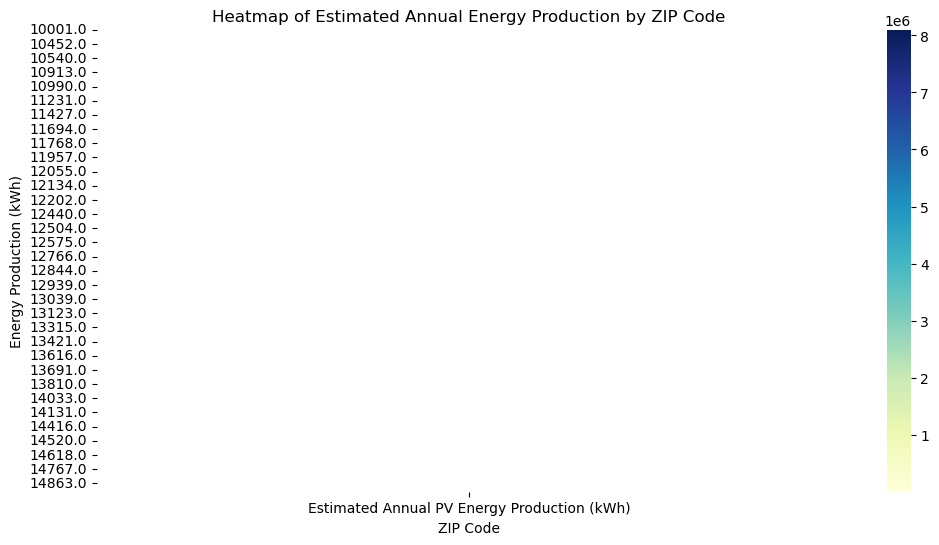

In [35]:
# For simplicity, we'll use a heatmap to visualize energy production by ZIP if lat/lon data is missing
plt.figure(figsize=(12, 6))
sns.heatmap(zip_energy.pivot_table(values='Estimated Annual PV Energy Production (kWh)', index='Zip'), cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Estimated Annual Energy Production by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Energy Production (kWh)')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


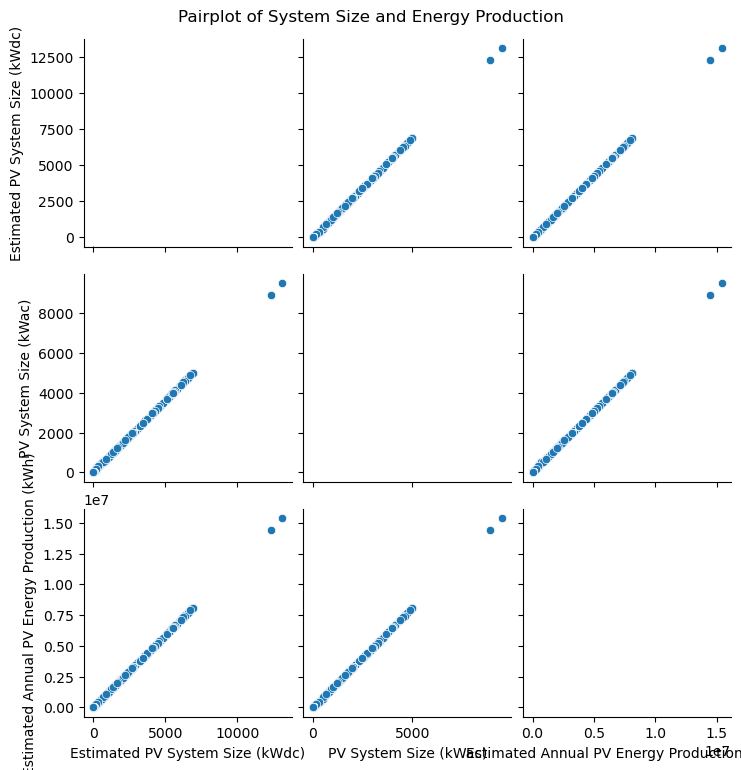

In [34]:
# 4. Pairplot to see relationships between numeric variables
sns.pairplot(df[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)']])
plt.suptitle('Pairplot of System Size and Energy Production', y=1.02)
plt.show()

In [24]:
# Select Features and Target
features = ['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Utility']
# Remove rows with missing target values
df = df.dropna(subset=['Estimated Annual PV Energy Production (kWh)'])
# Separate X (features) and y (target)
X = df[features]
y = df['Estimated Annual PV Energy Production (kWh)']

In [25]:
# Handle Categorical Variables using OneHotEncoding for Utility
categorical_columns = ['Utility']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded categorical features with numerical ones
X_encoded = pd.concat([X_encoded, X[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)']].reset_index(drop=True)], axis=1)


In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [27]:
# Define a simple model - we'll use RandomForestRegressor for this example
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 36.243314821547095


In [29]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Root Mean Squared Error: 1999.3391901556358
R² Score: 0.9999588855020782


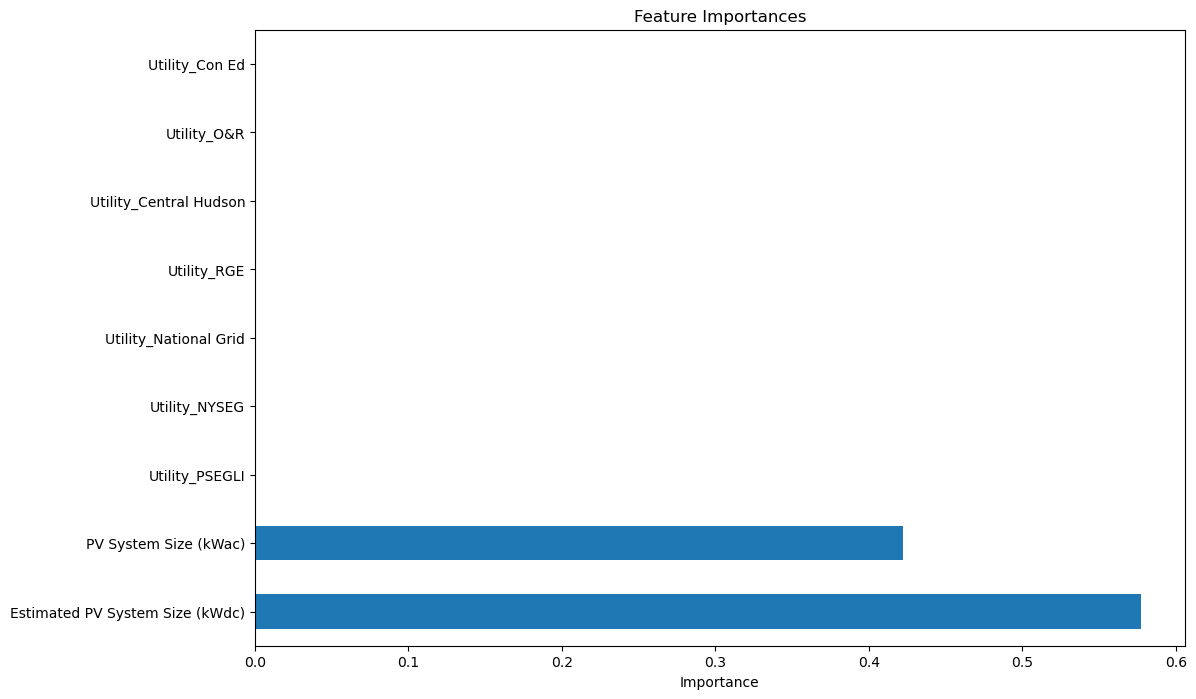

In [30]:
# Get feature importances
importances = model.feature_importances_
feature_names = X_encoded.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plot the feature importances
plt.figure(figsize=(12, 8))
forest_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()

In [42]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9991108260382106


In [31]:
# Using the best parameters to train the final model
best_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Root Mean Squared Error: 2004.7367303687647
R² Score: 0.9999586632119258


In [43]:
# Save the trained model to a file
dump(best_model, 'best_model.joblib')
print("Model saved as best_model.joblib")

Model saved as best_model.joblib


## 6. Conclusion

In this project, we successfully built a RandomForestRegressor model to predict the annual energy production of solar PV systems. The model was fine-tuned using hyperparameter tuning and achieved an impressive R² score of 0.99996 on the test set, indicating excellent performance.

Future work could involve exploring additional features, experimenting with other machine learning algorithms, and integrating the model into a web application for real-time predictions.
